<a href="https://colab.research.google.com/github/txusser/Master_IA_Sanidad/blob/main/2_3_4_Regresion_Log%C3%ADstica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresión logística

Datos: ILPD (Indian Liver Patient Dataset) Data Set
* [Descarga haciendo click en este enlace](https://github.com/txusser/Master_IA_Sanidad/blob/main/Modulo_2/datos/Indian_Liver_Patient_Dataset_(ILPD).csv)


El Indian Liver Patient Dataset (ILPD) es un conjunto de datos utilizado para el análisis y la predicción de enfermedades hepáticas en pacientes. Este dataset proviene de una base de datos de pacientes indios y está destinado a ayudar en la identificación de personas que pueden estar sufriendo de enfermedades hepáticas basadas en varias características clínicas y bioquímicas.

Características del Dataset:
Número de instancias: 583 pacientes
Número de variables/características: 10+1


### Variables del dataset ILPD:

1. **Age**: Edad del paciente
   - **Descripción**: Indica la edad del paciente en años.

2. **Gender**: Género del paciente
   - **Descripción**: Indica el género del paciente, donde 'Male' corresponde a masculino y 'Female' a femenino.

3. **Total_Bilirubin (TB)**: Bilirrubina total
   - **Descripción**: La cantidad total de bilirrubina en la sangre. La bilirrubina es una sustancia amarilla que se produce durante la descomposición normal de los glóbulos rojos. Altos niveles pueden indicar problemas hepáticos.

4. **Direct_Bilirubin (DB)**: Bilirrubina directa
   - **Descripción**: La cantidad de bilirrubina conjugada en la sangre. La bilirrubina directa está unida a otras moléculas que la hacen soluble en agua y puede ser un indicador más específico de enfermedades hepáticas.

5. **Alkaline_Phosphotase (Alkphos)**: Fosfatasa alcalina
   - **Descripción**: Una enzima relacionada con el conducto biliar. Niveles elevados pueden indicar bloqueo del conducto biliar o enfermedad hepática.

6. **Alamine_Aminotransferase (Sgpt)**: Alanina aminotransferasa
   - **Descripción**: Una enzima que se encuentra principalmente en el hígado. Niveles elevados pueden ser un signo de daño hepático.

7. **Aspartate_Aminotransferase (Sgot)**: Aspartato aminotransferasa
   - **Descripción**: Una enzima que se encuentra en el hígado y en otros tejidos del cuerpo. Niveles elevados pueden indicar daño hepático.

8. **Total_Proteins (TP)**: Proteínas totales
   - **Descripción**: La cantidad total de proteínas en la sangre. Las proteínas son esenciales para la estructura y función de todas las células del cuerpo.

9. **Albumin (ALB)**: Albúmina
   - **Descripción**: Una proteína producida por el hígado que ayuda a mantener el volumen y la presión sanguínea. Niveles bajos pueden indicar problemas hepáticos.

10. **Albumin_and_Globulin_Ratio (A/G Ratio)**: Relación albúmina y globulina
    - **Descripción**: La proporción de albúmina a globulina en la sangre. Esta relación puede ayudar a identificar diferentes tipos de enfermedades hepáticas.

11. **Dataset (Selector)**: Selector de datos
    - **Descripción**: Campo utilizado para dividir los datos en dos conjuntos (etiquetados por expertos). Se usa generalmente para indicar si el paciente tiene una enfermedad hepática (1) o no (2).

Espero que esta explicación te sea útil para comprender mejor el contenido y propósito de cada columna en el dataset ILPD.

In [102]:
import pandas as pd
import numpy as np

# Librerías de Scikit-learn
from sklearn.impute import SimpleImputer # Para imputación de valores faltantes
from sklearn.preprocessing import LabelEncoder # Para codificación de variables categóticas
from sklearn.preprocessing import StandardScaler # Para aplicar transformación de valores
from statsmodels.tools import add_constant  # Para agregar una columna de unos (constante) al conjunto de datos
import statsmodels.api as sm  # Para construir un modelo de regresión logística para selección de variables
from scipy import stats  # Para realizar cálculos estadísticos
from sklearn.linear_model import LogisticRegression # Modelo de regresión logística para ajustar los datos
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score # Métricas de evaluación del modelo
import matplotlib.pyplot as plt # Librería para gráficas


## 1. Revisión y procesado de valores faltantes

In [81]:
df = pd.read_csv("/content/Indian_Liver_Patient_Dataset_(ILPD).csv")
print("Columnas:", df.columns)

# Comprobamos el estado del conjunto de datos para ver si es necesario realizar
# alguna operación de imputación de datos

# Identificar valores faltantes
conteo_valores_faltantes = df.isnull().sum()
porcentaje_valores_faltantes = (df.isnull().sum() / len(df)) * 100

# Crear un DataFrame para mostrar el conteo y porcentaje de valores faltantes
datos_faltantes = pd.DataFrame({
    'Número': conteo_valores_faltantes,
    'Porcentaje': porcentaje_valores_faltantes
})

print(f" - Valores faltantes: \n {datos_faltantes}")

Columnas: Index(['EDAD', 'SEXO', 'TB', 'DB', 'AAP', 'SGPT', 'SGOT', 'TP', 'ALB', 'AG',
       'CLASS'],
      dtype='object')
 - Valores faltantes: 
        Número  Porcentaje
EDAD        0    0.000000
SEXO        0    0.000000
TB          0    0.000000
DB          0    0.000000
AAP         0    0.000000
SGPT        0    0.000000
SGOT        0    0.000000
TP          0    0.000000
ALB         0    0.000000
AG          4    0.686106
CLASS       0    0.000000


In [82]:
# Imputación de valores faltantes utilizando el algoritmo SimpleImputer de scikit-learn
# Rellenamos los valores faltantes teniendo en cuenta la mediana de la columna a
# imputar. Nota: este procedimiento (imputación por la mediana) se realiza sobre
# columnas de datos numéricos
imputador = SimpleImputer(strategy='median')
cols_numericas = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

df[cols_numericas] = imputador.fit_transform(df[cols_numericas])

# Valores faltantes tras la operación
print(f" => Número de valores faltantes: \n {df.isnull().sum()}")

 => Número de valores faltantes: 
 EDAD     0
SEXO     0
TB       0
DB       0
AAP      0
SGPT     0
SGOT     0
TP       0
ALB      0
AG       0
CLASS    0
dtype: int64


## 2. Transformación de datos

In [83]:
# Operaciones de transformación de datos

# Transformar la columna 'SEXO' a variables numéricas utilizando Label Encoding
print("Valores en la columna Sexo:", np.unique(df['SEXO']))

# Utilizamos un diccionario para hacer la codificación, de modo que mapeamos los
# valores Male a 1 y Female a 0
df['SEXO'] = df['SEXO'].map({'Male': 1, 'Female': 0})

# Remapeamos también la variable objetivo para que tome valores dicotómicos 1 o 0
df['CLASS'] = df['CLASS'].apply(lambda x: 1 if x == 1 else 0)

# Verificar los tipos de datos y la transformación realizada
print("\n - Tipos de datos:", df.dtypes)
print(f"\n - Primeras filas del dataset tras la codificación de variables categóricas:\n {df.head(10)}")

Valores en la columna Sexo: ['Female' 'Male']

 - Tipos de datos: EDAD     float64
SEXO       int64
TB       float64
DB       float64
AAP      float64
SGPT     float64
SGOT     float64
TP       float64
ALB      float64
AG       float64
CLASS      int64
dtype: object

 - Primeras filas del dataset tras la codificación de variables categóricas:
    EDAD  SEXO    TB   DB    AAP  SGPT   SGOT   TP  ALB    AG  CLASS
0  65.0     0   0.7  0.1  187.0  16.0   18.0  6.8  3.3  0.90      1
1  62.0     1  10.9  5.5  699.0  64.0  100.0  7.5  3.2  0.74      1
2  62.0     1   7.3  4.1  490.0  60.0   68.0  7.0  3.3  0.89      1
3  58.0     1   1.0  0.4  182.0  14.0   20.0  6.8  3.4  1.00      1
4  72.0     1   3.9  2.0  195.0  27.0   59.0  7.3  2.4  0.40      1
5  46.0     1   1.8  0.7  208.0  19.0   14.0  7.6  4.4  1.30      1
6  26.0     0   0.9  0.2  154.0  16.0   12.0  7.0  3.5  1.00      1
7  29.0     0   0.9  0.3  202.0  14.0   11.0  6.7  3.6  1.10      1
8  17.0     1   0.9  0.3  202.0  22.0   19

## 3. Selección de características
Vamos a ver cómo podemos utilizar un modelo de regresión logística para identificar las características más relevantes mediante la evaluación estadística de su capacidad predictiva. La selección de características es un paso crucial en la construcción de modelos de aprendizaje automático porque permite mejorar la interpretabilidad del modelo, reducir el sobreajuste (overfitting) y mejorar el rendimiento general del modelo.

### Contexto del Proceso de Selección de Características:

1. **Agregar una constante**:
   - **Propósito**: Incluir un intercepto en el modelo de regresión logística. Esto permite al modelo ajustar correctamente la línea de base de la predicción.

2. **Ajustar el modelo Logit**:
   - **Propósito**: Entrenar el modelo de regresión logística utilizando las características del conjunto de datos. Esto implica encontrar los coeficientes que mejor relacionan las características independientes con la variable dependiente.

3. **Evaluación del modelo**:
   - **Propósito**: Evaluar la adecuación del modelo mediante el resumen del ajuste del modelo. El resumen incluye métricas como los coeficientes, errores estándar, valores p, etc.

4. **Selección de características basadas en valores p**:
   - **Propósito**: Identificar qué características son estadísticamente significativas en la predicción de la variable objetivo. Los valores p proporcionan una medida de la probabilidad de que los coeficientes observados sean diferentes de cero por azar.
   - **Proceso**: Se consideran características relevantes aquellas cuyos valores p son menores a un umbral (típicamente 0.05), lo que indica que hay menos del 5% de probabilidad de que la asociación observada se deba al azar.

### Importancia del Proceso:

- **Reducción de la Dimensionalidad**: Al identificar y seleccionar solo las características más relevantes, se puede reducir el número de variables en el modelo, lo que simplifica el modelo y puede mejorar su rendimiento.
- **Mejora del Rendimiento del Modelo**: Eliminar características irrelevantes o redundantes puede mejorar la precisión del modelo y reducir el riesgo de sobreajuste.
- **Interpretabilidad**: Un modelo con menos características es más fácil de interpretar y entender, lo que es crucial en muchas aplicaciones, especialmente en el ámbito médico o financiero.
- **Eficiencia Computacional**: Modelos más simples requieren menos recursos computacionales para ser entrenados y evaluados.

En resumen, el proceso de selección de características utilizando un modelo de regresión logística y valores p es una técnica poderosa para construir modelos predictivos efectivos y eficientes, permitiendo a los analistas concentrarse en las variables que realmente importan.

In [93]:
# Agregar una constante al conjunto de características
X = df.drop('CLASS', axis=1)

df_constant = sm.add_constant(X)

# Ajustar el modelo Logit
model = sm.Logit(df['CLASS'], df_constant)
resultado = model.fit()

# Mostrar el resumen del modelo
print(f" - Resultados: {resultado.summary()}")

# Veámos cuáles son las características más relevantes

p_values = resultado.pvalues
relevant_features = p_values[p_values < 0.05].index.tolist()

# Eliminamos la constante de las características relevantes si está presente
if 'const' in relevant_features:
    relevant_features.remove('const')

print("Características relevantes a partir de los p-values:", relevant_features)
print("- Valores p:\n", p_values)

Optimization terminated successfully.
         Current function value: 0.491299
         Iterations 9
 - Resultados:                            Logit Regression Results                           
Dep. Variable:                  CLASS   No. Observations:                  583
Model:                          Logit   Df Residuals:                      572
Method:                           MLE   Df Model:                           10
Date:                Sat, 18 May 2024   Pseudo R-squ.:                  0.1797
Time:                        09:49:37   Log-Likelihood:                -286.43
converged:                       True   LL-Null:                       -349.18
Covariance Type:            nonrobust   LLR p-value:                 3.838e-22
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.4989      1.275     -2.744      0.006      -5.998      -1.000
EDAD          

### Comentarios:

Los resultados anteriores muestran un valor P superior al recomendado (5%) para algunas características. Esto implica que tienen una baja relación estadística con la probabilidad de enfermedad cardíaca.

A continuación, utilizaremos la técnica de eliminación retrospectiva para deshacernos de aquellas variables que aportan menor información. En [este enlace](https://medium.com/@abhinav.mahapatra10/ml-basics-feature-selection-part-2-3b9b3e71c14a) encontrarás más información acerca de esta técnica de selección de características.

La técnica de eliminación retrospectiva consiste en eliminar una por una las variables menos significativas, seguido de la ejecución de la regresión repetidamente hasta que todos los atributos tengan valores P inferiores a 0,05.

Otras referencia:
* [Regresión lineal múltiple (técnica de eliminación hacia atrás)](https://barcelonageeks.com/ml-regresion-lineal-multiple-tecnica-de-eliminacion-hacia-atras/)


In [89]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def back_feature_elem(df, dep_var, cols):
    """
    Toma el DataFrame, la variable dependiente y una lista de nombres de columnas.
    Ejecuta repetidamente una regresión logística eliminando la característica con el valor P más alto por encima de un umbral alfa
    en cada iteración, hasta que todos los valores P sean menores que alfa, devolviendo el resumen de la regresión final.
    """
    while len(cols) > 0:  # Continúa el proceso hasta que no quedan columnas por evaluar
        model = sm.Logit(dep_var, df[cols])  # Crea un modelo logístico con las columnas actuales
        result = model.fit(disp=0)  # Ajusta el modelo sin mostrar el proceso
        largest_pvalue = round(result.pvalues, 3).nlargest(1)  # Encuentra el valor P más alto y lo redondea a tres decimales
        if largest_pvalue.iloc[0] < 0.05:  # Si el valor P más alto es menor que 0.05, devuelve el resultado
            return result
        else:
            # Elimina la columna con el valor P más alto de la lista de columnas
            cols.remove(largest_pvalue.index[0])  # Elimina la columna por nombre

# Suponiendo que 'df_constant' es tu DataFrame y 'df' es otro DataFrame con la variable dependiente
if 'const' not in df_constant.columns:
    df_constant['const'] = 1
cols = df_constant.columns.tolist()  # Suponiendo que df_constant está definido y tiene las columnas apropiadas

def calculate_vif(df, cols):
    vif_data = pd.DataFrame()
    vif_data["feature"] = cols
    vif_data["VIF"] = [variance_inflation_factor(df[cols].values, i) for i in range(len(cols))]
    return vif_data

# Calcular VIF
vif_df = calculate_vif(df_constant, cols)
print(vif_df)

# Eliminar variables con VIF muy alto (e.g., VIF > 10)
cols = [col for col in cols if vif_df[vif_df['feature'] == col]['VIF'].values[0] < 10]


result = back_feature_elem(df_constant, df['CLASS'], cols)
print(result.summary())  # Muestra el resumen del modelo final



   feature        VIF
0    const  83.727366
1     EDAD   1.099327
2     SEXO   1.033815
3       TB   4.277109
4       DB   4.525273
5      AAP   1.121710
6     SGPT   2.820379
7     SGOT   2.810927
8       TP   5.549387
9      ALB  10.124110
10      AG   3.682718
                           Logit Regression Results                           
Dep. Variable:                  CLASS   No. Observations:                  583
Model:                          Logit   Df Residuals:                      579
Method:                           MLE   Df Model:                            3
Date:                Sat, 18 May 2024   Pseudo R-squ.:                  0.1628
Time:                        09:48:19   Log-Likelihood:                -292.33
converged:                       True   LL-Null:                       -349.18
Covariance Type:            nonrobust   LLR p-value:                 1.751e-24
                 coef    std err          z      P>|z|      [0.025      0.975]
-------------------------

## 4. Entrenamiento del modelo

In [ ]:
# Seleccionamos las características con las que entrenar nuestro modelo a
# partir de los resultados anteriores

X = df[relevant_features] # Matrix de características
y = df['CLASS'] # Vectore de clase (variable objetivo)

import sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=5)
print("X train shape:", X_train.shape)
print("y train shape:", y_train.shape)
print("y_train diez primeros valores:", y_train[:10])

### Entrenamos y evaluamos el modelo resultante

In [104]:
# Entrenar el modelo de regresión logística
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Predecir sobre el conjunto de prueba
y_pred = logreg.predict(X_test)

# Evaluar la precisión del modelo
acc = accuracy_score(y_test, y_pred)
print(50 * "*")
print("\n => Precisión del modelo: => {:.2f}".format(acc))

# Mostrar un informe de clasificación más detallado
print("\nInforme de clasificación:")
print(classification_report(y_test, y_pred))

**************************************************

 => Precisión del modelo: => 0.70

Informe de clasificación:
              precision    recall  f1-score   support

           0       0.58      0.19      0.29        37
           1       0.71      0.94      0.81        80

    accuracy                           0.70       117
   macro avg       0.65      0.56      0.55       117
weighted avg       0.67      0.70      0.64       117



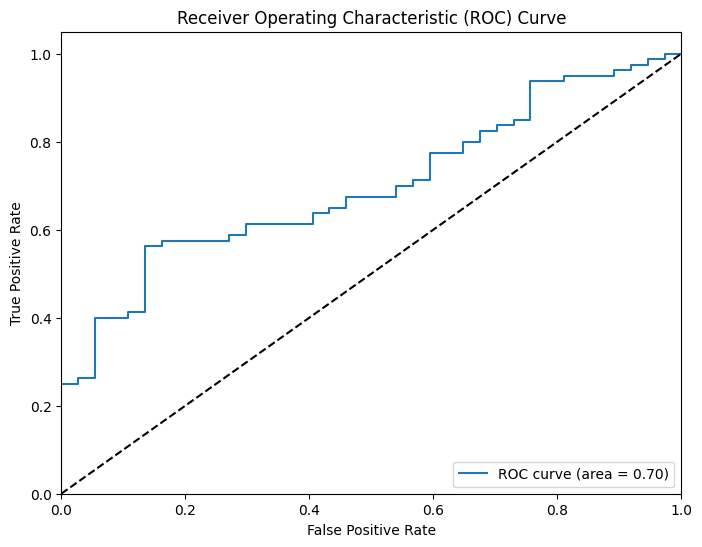

In [107]:
# Representar la curva ROC
y_pred_prob = logreg.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

A partir de los resultados de la evaluación del modelo, podemos extraer varias conclusiones sobre su desempeño. Aquí hay un desglose de los resultados y lo que implican:

### Resultados:

1. **Precisión del modelo (accuracy)**: 0.70
   - **Descripción**: La precisión del modelo es del 70%, lo que significa que el modelo clasifica correctamente el 70% de las instancias del conjunto de prueba.

2. **Informe de clasificación**:
   - **Clases**:
     - `0`: No tiene enfermedad hepática.
     - `1`: Tiene enfermedad hepática.
   
   - **Métricas por clase**:
     - **Precisión (precision)**:
       - Clase `0`: 0.58
       - Clase `1`: 0.71
     - **Recuperación (recall)**:
       - Clase `0`: 0.19
       - Clase `1`: 0.94
     - **F1-score**:
       - Clase `0`: 0.29
       - Clase `1`: 0.81
     - **Soporte (support)**:
       - Clase `0`: 37 instancias
       - Clase `1`: 80 instancias

   - **Promedios**:
     - **Macro promedio (macro avg)**:
       - Precisión: 0.65
       - Recuperación: 0.56
       - F1-score: 0.55
     - **Promedio ponderado (weighted avg)**:
       - Precisión: 0.67
       - Recuperación: 0.70
       - F1-score: 0.64

### Conclusiones:

1. **Desempeño General**:
   - El modelo tiene una precisión general del 70%, lo que sugiere que en general realiza una predicción correcta en el 70% de los casos.

2. **Desempeño por Clase**:
   - **Clase `0` (No tiene enfermedad hepática)**:
     - La precisión es baja (0.58), lo que indica que, cuando el modelo predice que un paciente no tiene enfermedad hepática, solo es correcto el 58% de las veces.
     - La recuperación es muy baja (0.19), lo que significa que solo identifica correctamente el 19% de los pacientes que realmente no tienen enfermedad hepática.
     - El F1-score es bajo (0.29), reflejando el bajo equilibrio entre precisión y recuperación para esta clase.
   
   - **Clase `1` (Tiene enfermedad hepática)**:
     - La precisión es alta (0.71), indicando que el modelo es correcto el 71% de las veces cuando predice que un paciente tiene enfermedad hepática.
     - La recuperación es muy alta (0.94), lo que significa que identifica correctamente el 94% de los pacientes que realmente tienen enfermedad hepática.
     - El F1-score es alto (0.81), lo que refleja un buen equilibrio entre precisión y recuperación para esta clase.

3. **Desbalance de Clases**:
   - Hay un desbalance en el número de instancias entre las clases (37 para `0` y 80 para `1`), lo que puede influir en las métricas de desempeño.
   - El modelo parece estar mejor ajustado para identificar pacientes con enfermedad hepática (clase `1`) en comparación con los que no la tienen (clase `0`).

### Implicaciones:

- **Necesidad de Ajuste**: El bajo desempeño en la clase `0` sugiere que el modelo puede necesitar ajustes, tales como técnicas de balanceo de clases (submuestreo, sobremuestreo) o ajuste de los umbrales de decisión.
- **Evaluación del Riesgo**: En contextos médicos, identificar correctamente a los pacientes que tienen una enfermedad es crucial. Sin embargo, el modelo también debe mejorar en la identificación de aquellos que no la tienen para evitar falsos positivos.

### Próximos Pasos:

- **Ajustar el Modelo**: Considerar técnicas para manejar el desbalance de clases y mejorar la precisión y recuperación de la clase `0`.
- **Validación Cruzada**: Utilizar validación cruzada para obtener una mejor evaluación del desempeño general del modelo.
- **Explorar Otros Modelos**: Evaluar otros algoritmos de clasificación que puedan manejar mejor el desbalance de clases y mejorar el rendimiento general.

En resumen, aunque el modelo muestra un buen desempeño para la clase que indica enfermedad hepática, necesita mejoras significativas para identificar correctamente a los pacientes que no tienen la enfermedad.